# Project Name - Google Play Store App Review Analysis

## PROJECT SUMMARY

This exploratory data analysis (EDA) project focuses on analyzing the Google Play Store apps data and customer reviews dataset. The goal is to derive actionable insights that can help app-making businesses succeed in the Android market.

The Google Play Store data includes information about various apps such as their names, categories, average user ratings, number of reviews, size, number of installs, pricing, content rating, genres and more. This dataset provides a comprehensive overview of the apps available on the Play Store. The user reviews dataset contains customer reviews for different apps. It includes the app name, sentiment of the review (positive, neutral, or negative), sentiment polarity (numerical score indicating the review's positivity or negativity) and sentiment subjectivity (score indicating the review's objectivity or subjectivity).


By analyzing these datasets, valuable insights can be obtained. Some potential areas of analysis include:

1.   App Categories: Identifying the most popular app categories can help developers
understand the market demand and focus their efforts accordingly.
2.   Ratings and Reviews: Examining the relationship between app ratings, the number of reviews, and sentiment can provide insights into user satisfaction and feedback. It can help developers understand the factors that contribute to positive or negative user experiences.
3.   App Size and Installs: Analyzing the relationship between app size, number of installs, and user ratings can help developers optimize app sizes and understand the impact on user adoption and satisfaction.
4.   Pricing Strategy: Exploring the distribution of free and paid apps, analyzing their revenue potential, and understanding the relationship between pricing, user ratings, and downloads can guide developers in formulating effective pricing strategies.
5.   App Updates: Analyzing the frequency and impact of app updates on user ratings and reviews can provide insights into the importance of maintaining and improving app quality over time.
6. Sentiment Analysis: Studying sentiment polarity and subjectivity in customer reviews can help identify key strengths and weaknesses of apps and guide developers in addressing user concerns and enhancing user satisfaction.



By conducting a thorough EDA and gaining insights from the data, app developers can make informed decisions, prioritize areas for improvement, and create apps that cater to user needs and preferences.

## PROBLEM STATEMENT
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps.

## BUSINESS OBJECTIVE

Discovering key factors responsible for app engagement and success.

## EXPLORATORY DATA ANALYSIS

IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATA

In [2]:
# Reading the the Play Store data and User Reviews data from csv files

play_store = pd.read_csv('/googleplaystore.csv')
user_reviews = pd.read_csv('/googleplaystore_user_reviews.csv')

DATASET PREVIEW

In [3]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


***1.BASIC INFORMATION ABOUT THE DATASET***

Shape of the datasets (number of rows and columns)

In [5]:
#Shape of the play_store dataset
play_store.shape

(10841, 13)

In [6]:
#Shape of the user_reviews dataset
user_reviews.shape

(64295, 5)

Dataset information

In [7]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Duplicate Values

In [9]:
play_store.duplicated().sum()

np.int64(483)

In [10]:
user_reviews.duplicated().sum()

np.int64(33616)

Checking for NULL Values

In [11]:
# Missing values/null values count in play store data
play_store.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


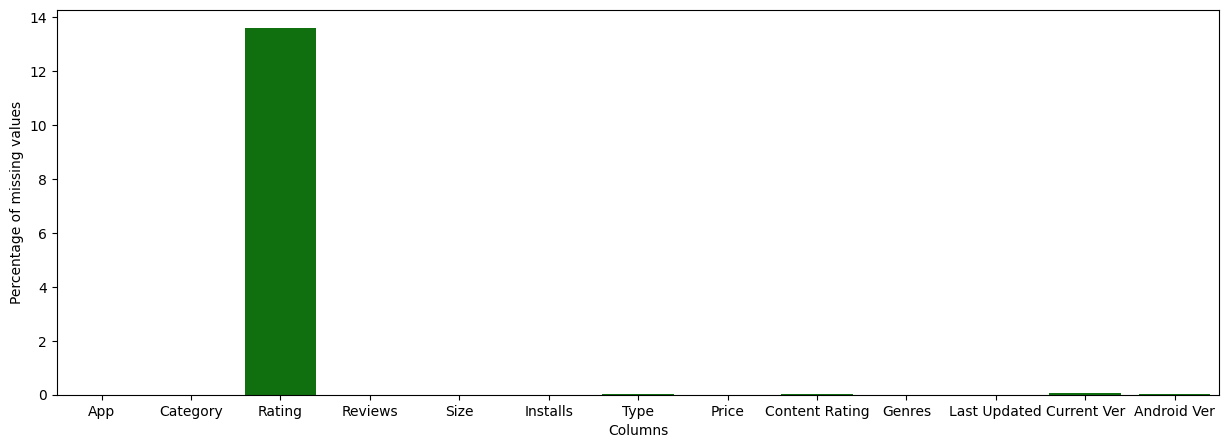

In [12]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.barplot(x=play_store.columns,y=(play_store.isnull().sum()/play_store.shape[0]) *100, color='green')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.show()

<Axes: >

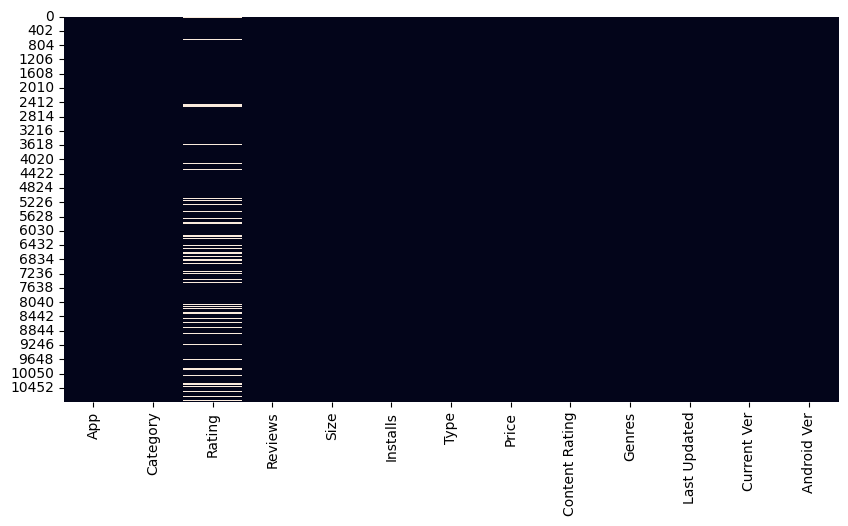

In [13]:
#Heatmap to visualize the null/missing values in the dataset
plt.figure(figsize=(10,5))
sns.heatmap(play_store.isnull(),cbar=False)

In [14]:
#Percentage of null/missing values
play_store.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Since there is only 1 missing value in both 'Type' and 'Content Rating', we can drop them.

In [15]:
play_store.dropna(subset = ['Type','Content Rating'], inplace = True)

In [16]:
play_store.shape

(10839, 13)

***2. UNDERSTANDING THE VARIABLES***

Descriptive information

In [17]:
play_store.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [18]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Understanding the different variables

**Variable Description**


**Google Play Store Data**

App - Name of the app

Category - Category of the app

Rating - The average user rating of the app, ranging from 1 to 5

Reviews - Number of user reviews for the app

Size - Size of the app in MB

Installs - Number of installs for the app

Type - Whether the app is free or paid

Price - Price of the app (o if the app is free)

Content Rating - Age group for which the app is suitable

Genres - The category of the app according to the Play Store's classification system

Last Updated - The date when the app was last updated on the Plav Store

Current Ver - Current version of the app

Android Ver - Minimum Android version reguired to run the app



**User Reviews Data**

App - The name of the app for which the review was submitted

Translated_Review - The review text submitted by the user, translated to English if necessary.

Sentiment - The sentiment of the customer review, which can be "Positive", "Natural", or "Negative".

Sentiment_Polarity - The numerical polarity score of the review, rangig from -1(most negative) to 1(most positive)

Sentiment_Subjectivity - The subjectivity score of the review, ranging form 0(objective) to 1 (subjevtive)

In [19]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [20]:
play_store['Category'].value_counts()

,count
Category,
FAMILY,1971
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [21]:
play_store['Type'].value_counts()

,count
Type,
Free,10039
Paid,800


In [22]:
play_store['Genres'].value_counts()

,count
Genres,
Tools,842
Entertainment,623
Education,549
Medical,463
Business,460
...,...
Role Playing;Brain Games,1
Strategy;Education,1
Racing;Pretend Play,1


In [23]:
play_store['Content Rating'].value_counts()

,count
Content Rating,
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,413
Adults only 18+,3
Unrated,2


***3. DATA WRANGLING***

In [24]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


For our analysis we do not require the 'Current Ver' &	'Android Ver' columns. Hence dropping them.

In [25]:
play_store.drop(columns=['Current Ver','Android Ver'],axis=1, inplace=True)

In [26]:
play_store.shape

(10839, 11)

In [27]:
play_store.duplicated().sum()

np.int64(483)

In [28]:
play_store.drop_duplicates(inplace=True)

In [29]:
play_store.shape

(10356, 11)

We will be deleting on the basis of 'App' column because it has dupicates and the only varying column is the no. of reviews, so it is kind of a duplicate row, won't contribute much to our analysis

In [30]:
play_store['App'].duplicated().sum()

np.int64(698)

In [31]:
play_store.drop_duplicates(subset = 'App', inplace=True)

In [32]:
play_store.shape

(9658, 11)

In [33]:
play_store.isnull().sum()

,0
App,0
Category,0
Rating,1462
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


For 'Ratings' column, we have already seen that the percentage of nulls is high (nearly 13%), we cannot drop all these values as it will affect the analysis, hence we need to fill them.

Checking Outliers

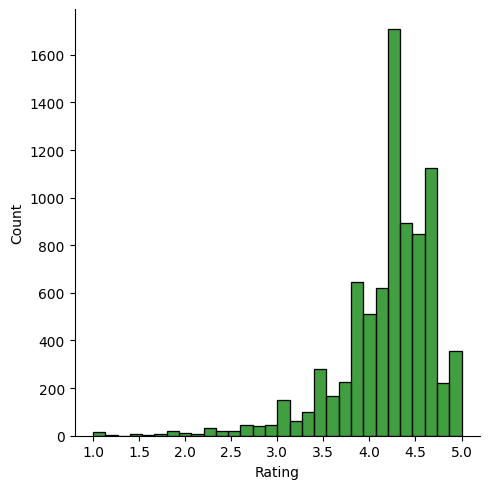

In [34]:
#Plotting a distplot to see the distribution of datapoints.
sns.displot(play_store['Rating'], color = 'green', bins=30);

Distribution plot is a useful visualization tool to quickly identify the distribution of a dataset and detect any potential outliers. It allows us to visualize the distribution of the data.

Here, we can clearly see that there are many outliers in Rating column.

<Axes: xlabel='Rating'>

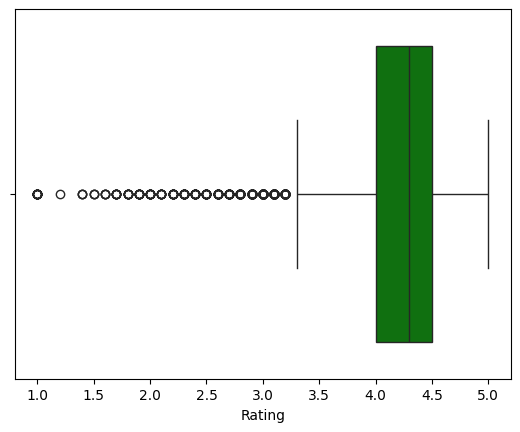

In [35]:
# Checking outliers im Rating using boxplot
sns.boxplot(x = play_store['Rating'],color = 'green')

In a box plot, outliers are plotted as individual points outside of the whiskers. The whiskers are typically defined as 1.5 times the interquartile range (IQR). Any data point outside of the whiskers is considered an outlier.

From the above visuals we can see that there is more distribution to the right. Therefore, the median is a better representation of the majority of the values in the variable.

Although the 'Rating' column is a categorical data, it is not wise to replace data with mode because there are more null values.

In [36]:
play_store['Rating'] = play_store['Rating'].fillna(play_store['Rating'].median())

In [37]:
play_store.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [38]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   object 
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
dtypes: float64(1), object(10)
memory usage: 905.4+ KB


In [39]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


Columns like size, 'Review' and 'price' has object datatype instead of any numeric datatype. So, need to convert them into numeric datatype.

**Review Column**

In [40]:
# Converting 'Reviews' column of the play_store_date dataframe into float
play_store['Reviews'] = play_store['Reviews'].astype(float)

**Price column**

In [41]:
#Remove the '$' symbol in 'Price' column
play_store['Price'] = play_store['Price'].apply(lambda x: x.strip('$'))

In [42]:
#Converting to float datatype
play_store['Price'] = play_store['Price'].astype(float)

**Last Updated column**

In [43]:
# Converting 'Last Updated'column of the play_store_data dataframe into datetime
play_store['Last Updated'] = pd.to_datetime(play_store['Last Updated'])

#adding a new column: Last Updated Year
play_store['Last Updated Year'] = play_store['Last Updated'].dt.year


**Size column**

In [44]:
#Removing 'M'
play_store['Size'] = play_store['Size'].apply(lambda x: x.strip('M'))

#Replacing 'Varies with device' with NaN
play_store['Size'] = play_store['Size'].str.replace('Varies with device','NaN')

#Removing 'k'
play_store['Size'] = play_store['Size'].apply(lambda x: x.strip('k'))

In [45]:
play_store['Size'] = play_store['Size'].astype(float)

**Installs Columns**

In [46]:
#Remoxing the '+' sign
play_store['Installs'] = play_store['Installs'].apply(lambda x: x.strip('+'))

#removing the ','
play_store['Installs'] = play_store['Installs'].apply(lambda x: x.replace(',',''))

In [47]:
play_store['Installs'] = play_store['Installs'].astype(int)

In [48]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9658 non-null   object        
 1   Category           9658 non-null   object        
 2   Rating             9658 non-null   float64       
 3   Reviews            9658 non-null   float64       
 4   Size               8432 non-null   float64       
 5   Installs           9658 non-null   int64         
 6   Type               9658 non-null   object        
 7   Price              9658 non-null   float64       
 8   Content Rating     9658 non-null   object        
 9   Genres             9658 non-null   object        
 10  Last Updated       9658 non-null   datetime64[ns]
 11  Last Updated Year  9658 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(5)
memory usage: 1.2+ MB


In [49]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,2018


## Below are the manupulations done:

-> Removed the duplicate items in 'Apps' column.

-> Dropped the Android version and current version column as those columns are not much useful for analysis.

-> Replaced the null values in the 'Ratings' column with the median value.

-> Changed the Reviews data column from object type to float.

-> Changed the Last Updated data column to datetime and added a new column

-> Cleaned the Size data column by converting KB to MB for the sake of uniformity and changed the column from object type to float.

-> Changed the Price data column from object type to float.

-> Cleaned the Installs data column by removing some characters and changed the column from object type to int.

***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Free and Paid Apps available on Play Store**

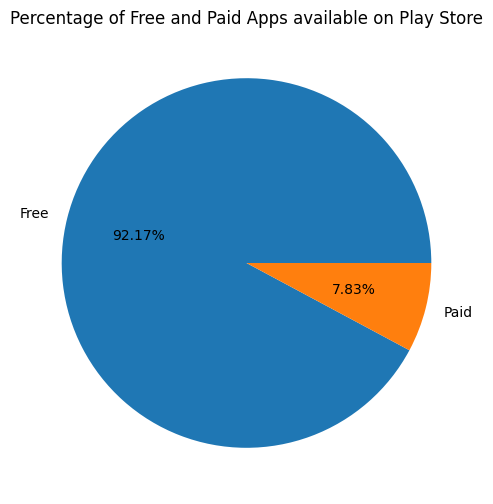

In [50]:
# creating pie chart for paid and free apps

plt.figure(figsize=(10,6))

plt.pie(play_store['Type'].value_counts(), autopct='%1.2f%%',labels = ['Free','Paid'])
plt.title('Percentage of Free and Paid Apps available on Play Store')
plt.show()

**Insights Gained:**

->   Dominance of Free Apps: The vast majority of apps on the Play Store are free (92.17%). This indicates that the app market is heavily skewed towards free offerings.

->   Small Percentage of Paid Apps: Only a small fraction of apps (7.83%) are paid. This suggests that users generally prefer free apps, and developers may find it challenging to monetize apps through upfront payments.


This suggests that generating revenue solely through paid app downloads might be more challenging due to the abundance of free alternatives. This could potentially limit the revenue potential for businesses which are solely relying on paid apps.

##**Percentage of Review sentiments**

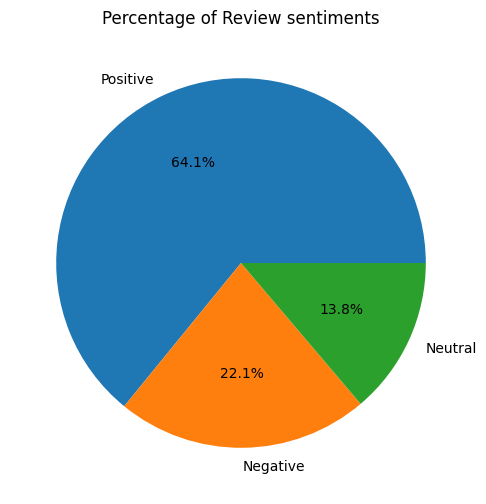

In [51]:
#percentage of review sentiments

plt.figure(figsize=(10,6))

labels = user_reviews['Sentiment'].value_counts(sort = True).index
sizes = user_reviews['Sentiment'].value_counts(sort = True)
sizes
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Review sentiments')
plt.show()

**Insights Gained:**

Positive reviews are 64.12%

Negative reviews are 22.10%

Netural reviews are 13.78%



• **Positive sentiment percentage**: The insights reveal that a significant portion of reviews (64.12%) have a positive sentiment. This indicates that a considerable number of users have a positive perception or experience with the product or service. Positive reviews can attract new customers, build trust, and enhance the reputation of the business, potentially leading to increased sales and customer loyalty.

• **Negative sentiment percentage:** The insights indicate that a portion of reviews (22.10%) have a negative sentiment. Negative reviews can be concerning as they may indicate customer dissatisfaction, potential issues with the product or service, or gaps in customer experience. It's crucial for businesses to address and resolve these concerns to prevent negative growth. Ignoring or not effectively addressing negative reviews can lead to a decline in customer satisfaction, negative word-of-mouth, and potential loss of customers.

• **Neutral sentiment percentage:** The insights show that a portion of reviews (13.78%) have a neutral sentiment. While neutral reviews may not have an immediate positive or negative impact, they still provide valuable feedback and insights for businesses. Analyzing neutral reviews can help identify areas for improvement. address customer concerns. and make necessarv adiustments to enhance the overall customer experience

##**Content Rating**

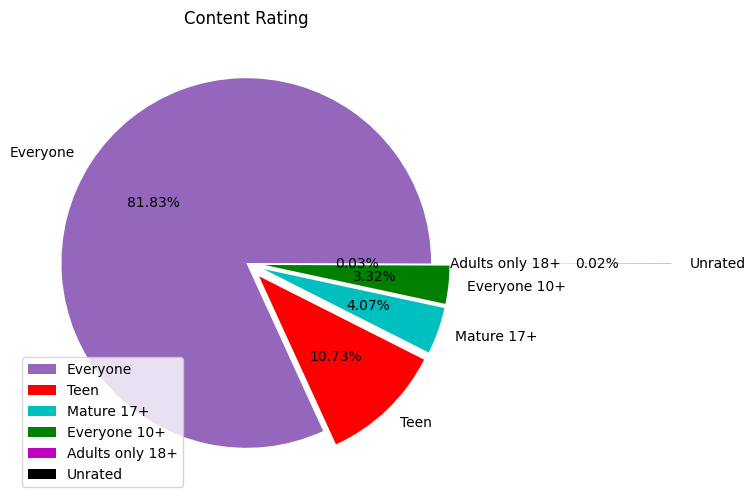

In [52]:
#Visualizing content rating percentage

plt.figure(figsize=(10,6))

size = play_store['Content Rating'].value_counts(sort = True)
labels = play_store['Content Rating'].value_counts(sort = True).index

explode = (0, 0.1, 0.1, 0.1, 0.0, 1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']

plt.pie(size, labels=labels, autopct ='%.2f%%',colors=colors, explode=explode, textprops={'fontsize':10} )
plt.title('Content Rating')
plt.legend()
plt.show()

**Insights Gained**

Majority of the apps can be used by Everyone

•   Business need to focus on apps which can be used by everyone for better success as it reaches ide range of people.

•   Catering to only set of customers may cause companies to miss out other potential customers.

##**Percentage of Installs by Content Rating**

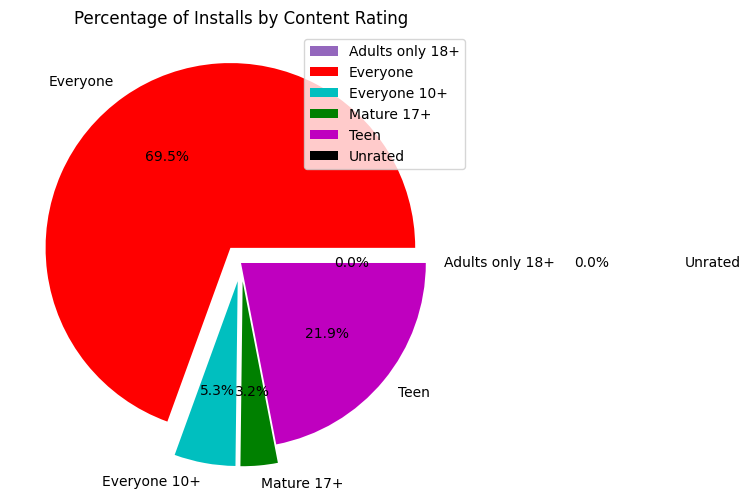

In [53]:
#grouping installs by content rating

install_counts = play_store.groupby('Content Rating')['Installs'].sum()
install_counts_per = (install_counts / install_counts.sum()) * 100
install_counts_per

plt.figure(figsize=(10,6))
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
explode = (0, 0.1, 0.1, 0.1, 0.0, 1.3)

plt.pie(install_counts_per, labels=install_counts_per.index, colors=colors, explode=explode, autopct="%.1f%%", textprops ={'fontsize': 10})

#Add tittle
plt.title("Percentage of Installs by Content Rating")

#Show Plot
plt.legend()

plt.show()

**Insights Gained**

•   "Everyone" Dominates: The vast majority of app installs (69.5%) are for apps rated "Everyone". This indicates that apps suitable for all age groups have the widest reach and popularity on the Play Store.

•   Significant Installs for "Teen": Apps rated "Teen" account for a substantial portion of installs (21.9%). This suggests that a significant number of users are in the teenage demographic.

•   Lower Installs for Other Categories: The remaining content ratings ("Everyone 10+", "Mature 17+", and "Adults only 18+") have considerably lower percentages of installs. This implies that apps targeted at these specific age groups have a smaller audience compared to "Everyone" and "Teen" categories.

## **Count of applications in each category by their type**

In [54]:
# The count of applications in each category by their type
app_count = play_store.groupby(['Category', 'Type',])[['App']].count().reset_index().rename(columns={'App':'Count','Index':'App'})
df_app_count = app_count.pivot(index='Category', columns='Type', values='Count').fillna(0).reset_index()

In [55]:
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,159
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [56]:
df_app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,61.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,6.0
8,EDUCATION,115.0,4.0
9,ENTERTAINMENT,100.0,2.0


<Figure size 1000x1000 with 0 Axes>

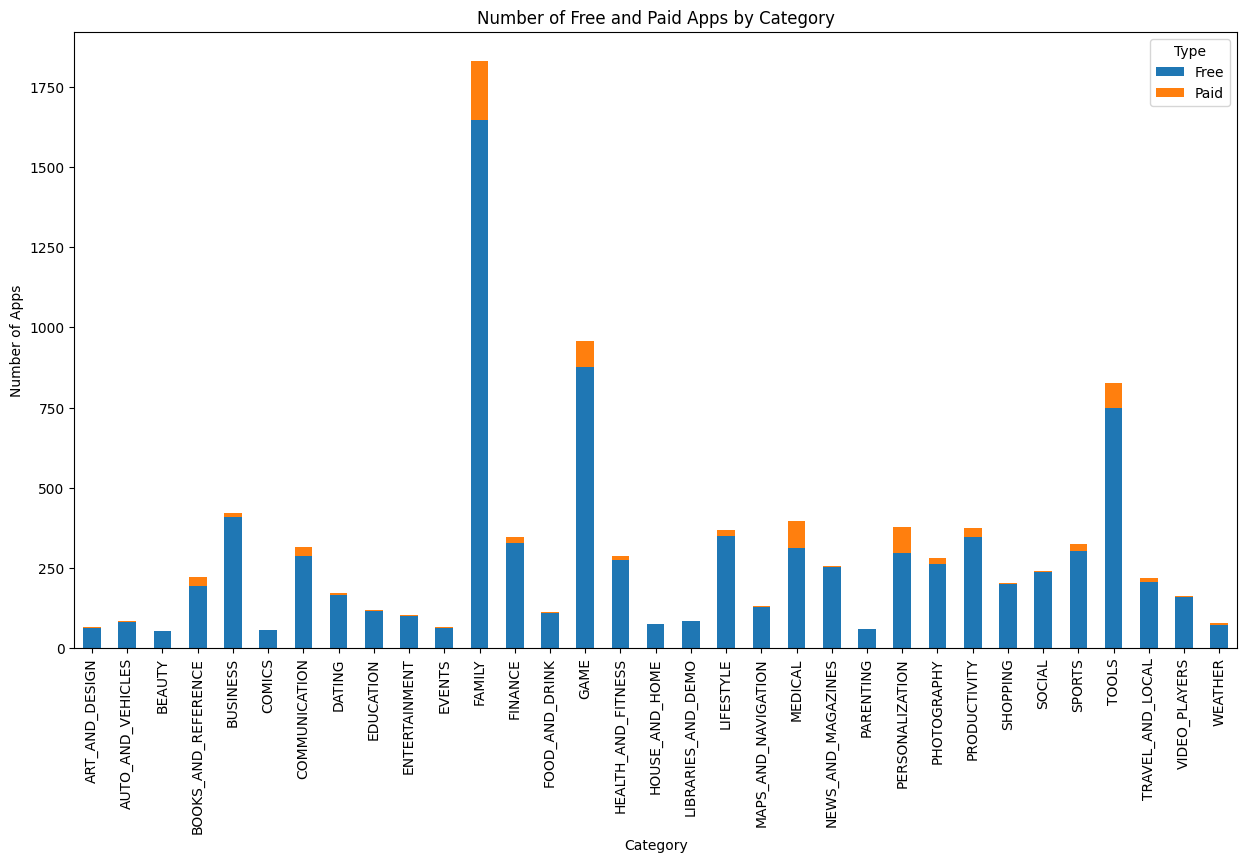

In [57]:
plt.figure(figsize=(10, 10))

df_app_count.set_index('Category').plot(kind='bar',  stacked=True,  figsize=(15,8))

plt.title('Number of Free and Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

**Insights Gained:**

Family, Game and Tools are top three categories with highest count of applications.

•  By focusing on these popular categories, businesses have the opportunity to cater to a larger user base, increase app downloads, and potentially generate higher revenue.

•  The categories with lower application count may indicate a lack of competition; or it may also indicate lack of demand which could potentiall lead to negative growth if businesses invest significant resources in developing apps for these categories without proper market research.

•  It's important for businesses to carefully evaluate the market potential and user demand before investing in app development for less popular categories.

##**Categories in which the top 10 paid apps belong**

In [58]:
# Filtering the 'play_store_data' dataframe to include only paid apps
paid_df = play_store[play_store['Type'] == 'Paid']

#calculate the revenue for each paid app by multiplying the number of instsalls with the price
paid_df['Revenue'] = paid_df['Installs'] * paid_df['Price']

#app with max revenue
app_wtih_max_revenue = paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

#Top 10 paid apps by revenue
paid_df.sort_values('Revenue', ascending = False).head(10)

#df for top 10 paid apps by revenue
top_10_paid_apps = paid_df.sort_values('Revenue', ascending = False).head(10)
top_10_paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Year,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,2018,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2018,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,2017,19999500.0
4034,Hitman Sniper,GAME,4.6,408292.0,29.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,2018,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.0,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,2015,6990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48.0,1000000,Paid,5.99,Everyone,Photography,2018-07-25,2018,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,872.0,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,2018,5990000.0
8804,DraStic DS Emulator,GAME,4.6,87766.0,12.0,1000000,Paid,4.99,Everyone,Action,2016-07-19,2016,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,2018,4000000.0
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,2018,3999900.0


In [59]:
#Category of top 10 apps

top_10_paid_apps['Category'].value_counts()

,count
Category,
LIFESTYLE,3
GAME,3
FAMILY,2
FINANCE,1
PHOTOGRAPHY,1


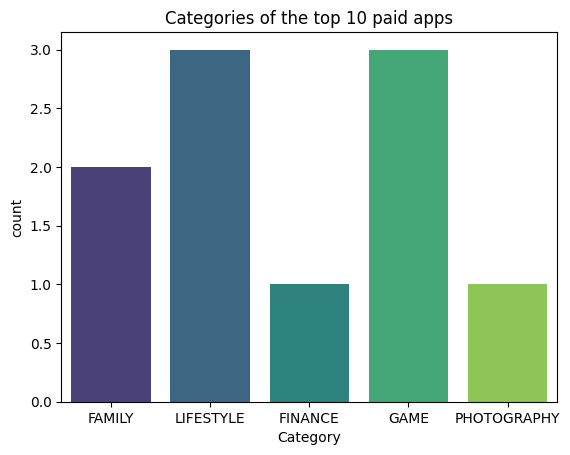

In [60]:
# Plot a bar chart showing the categories of the top 10 paid apps
sns.countplot(x = 'Category', data = top_10_paid_apps, palette='viridis')
plt.title('Categories of the top 10 paid apps')
plt.show()

**Insights Gained:**


Lifestyle and Game categories has most no. of paid apps.

By analyzing the top 10 paid apps and their categories, the business can understand which categories are more lucrative and popular among users who are willing to pay for apps. This information can guide the business in developing and promoting similar apps in those categories, potentially leading to increased revenue and customer satisfaction.

In [61]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,2018


##**Top 10 paid apps by Content rating**

In [62]:
#df for paid apps
paid_df1 = play_store[play_store['Type']=='Paid']

#calculate revenue
paid_df1['Revenue'] = paid_df1['Installs'] * paid_df1['Price']
paid_df1

#top 10 apps by revenue
top_10_paid_apps1 = paid_df1.sort_values('Revenue', ascending = False).head(10)
top_10_paid_apps1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Year,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,2018,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2018,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,2017,19999500.0
4034,Hitman Sniper,GAME,4.6,408292.0,29.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,2018,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.0,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,2015,6990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48.0,1000000,Paid,5.99,Everyone,Photography,2018-07-25,2018,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,872.0,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,2018,5990000.0
8804,DraStic DS Emulator,GAME,4.6,87766.0,12.0,1000000,Paid,4.99,Everyone,Action,2016-07-19,2016,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,2018,4000000.0
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,2018,3999900.0


In [63]:
#content rating of top 10 apps
top_10_paid_apps1['Content Rating'].value_counts()

,count
Content Rating,
Everyone,7
Mature 17+,2
Everyone 10+,1


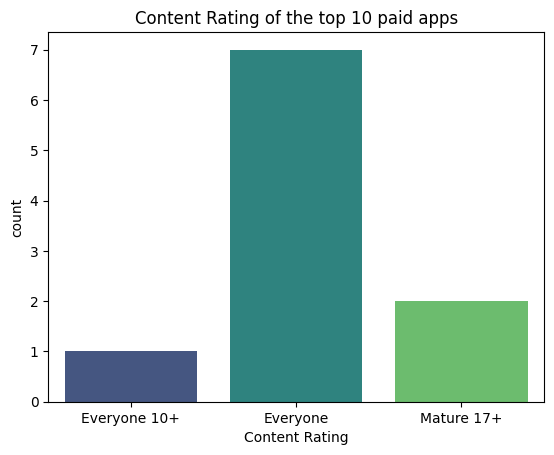

In [64]:
# Plot
sns.countplot(x = 'Content Rating', data=top_10_paid_apps1, palette='viridis')
plt.title('Content Rating of the top 10 paid apps')
plt.show()

**Insights Gained:**

The data strongly suggests that to achieve high popularity and sales in the paid app market, targeting a general audience ("Everyone") is a common strategy.

However, there's also a significant presence of apps aimed at a mature 17+ adult audience. Apps specifically targeting the "Everyone 10+" age group appear to be less common among the top paid applications.

##**Rating against different other columns**

In [65]:
#Checking for the numeric columns
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9658 non-null   object        
 1   Category           9658 non-null   object        
 2   Rating             9658 non-null   float64       
 3   Reviews            9658 non-null   float64       
 4   Size               8432 non-null   float64       
 5   Installs           9658 non-null   int64         
 6   Type               9658 non-null   object        
 7   Price              9658 non-null   float64       
 8   Content Rating     9658 non-null   object        
 9   Genres             9658 non-null   object        
 10  Last Updated       9658 non-null   datetime64[ns]
 11  Last Updated Year  9658 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(5)
memory usage: 1.2+ MB


In [66]:
#filtering the numeric columns
numeric_columns = play_store.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')


In [67]:
#Creating a new dataframe with the numeric columns for further analysis
numeric_db = play_store[numeric_columns].copy()
numeric_db

,Rating,Reviews,Size,Installs,Price
0,4.1,159.0,19.0,10000,0.0
1,3.9,967.0,14.0,500000,0.0
2,4.7,87510.0,8.7,5000000,0.0
3,4.5,215644.0,25.0,50000000,0.0
4,4.3,967.0,2.8,100000,0.0
...,...,...,...,...,...
10836,4.5,38.0,53.0,5000,0.0
10837,5.0,4.0,3.6,100,0.0
10838,4.3,3.0,9.5,1000,0.0
10839,4.5,114.0,NaN,1000,0.0


In [68]:
# Grouping these numeric columns on the basis of Ratings

ratings_df = numeric_db.groupby('Rating').sum().reset_index()
ratings_df

,Rating,Reviews,Size,Installs,Price
0,1.0,28.0,228.8,5170,4.48
1,1.2,44.0,27.0,1000,0.00
2,1.4,98.0,20.2,7000,0.00
3,1.5,61.0,54.0,1105,0.00
4,1.6,691.0,64.6,152000,0.00
5,1.7,2360.0,80.3,81700,4.99
6,1.8,3418.0,935.2,519500,1.49
7,1.9,1874.0,154.2,189000,0.00
8,2.0,2997.0,191.4,5040150,4.59
9,2.1,3073.0,164.2,182000,0.00


Text(0, 0.5, 'Price')

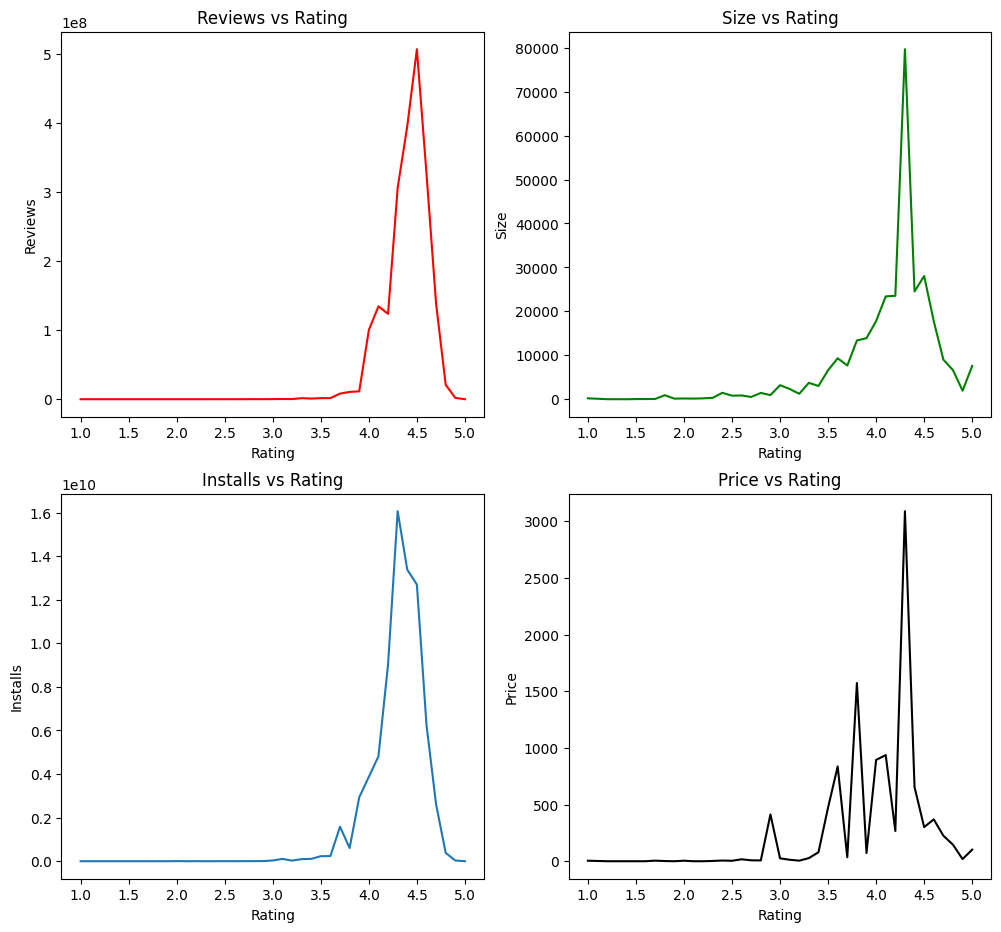

In [69]:
#Plotting Subplots

fig,axes = plt.subplots(2,2, figsize=(12,11))

#Plot for Reviews column
axes[0,0].plot(ratings_df['Rating'],ratings_df['Reviews'], 'r')
axes[0,0].set_title('Reviews vs Rating')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Reviews')

#Plot for size column
axes[0,1].plot(ratings_df['Rating'],ratings_df['Size'], 'g')
axes[0,1].set_title('Size vs Rating')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Size')

#Plot for Installs column
axes[1,0].plot(ratings_df['Rating'],ratings_df['Installs'])
axes[1,0].set_title('Installs vs Rating')
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Installs')

#Plot for Price column
axes[1,1].plot(ratings_df['Rating'],ratings_df['Price'] ,'k')
axes[1,1].set_title('Price vs Rating')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Price')

**Insights Gained:**

1. Apps with higher ratings tend to attract significantly more user reviews. The highest number of reviews seems to be concentrated around a rating of 4.5.

2. The apps with the largest sizes (peaking around 80,000+) are concentrated in the higher rating range, specifically around 4.5. This could suggest that more feature-rich or graphically intensive apps (which tend to be larger) are generally better received by users.

3. Higher app ratings are strongly associated with a significantly larger number of installs, highlighting the importance of a good rating for app discoverability and popularity.

4. There is no direct relationship between the price of an app and its rating.
This insight suggests that solely the increased price of an app may not lead to its negative growth or impact its rating negatively. However, it's important to consider factors such as app quality, features, and competition when determining the optimal pricing strategy to avoid negative growth.


It's important to remember that correlation doesn't equal causation. While these plots suggest relationships, further analysis would be needed to determine the underlying reasons for these trends. For example, do larger apps have better ratings because they are more feature-rich, or is there another factor at play?

##**Trend of the number of Apps by Year : Free vs Paid**

In [70]:
#Filtering the 'play_store_data' dataframe to include only paid apps
paid_app_df = play_store[play_store['Type'] == 'Paid']

# Filtering the 'play_store_data' dataframe to include only free apps
free_app_df = play_store[play_store['Type'] == 'Free']

#grouping the dataframes by year

paid_app_count_df = paid_app_df.groupby('Last Updated Year')['App'].count()
free_app_count_df = free_app_df.groupby('Last Updated Year')['App'].count()

In [71]:
print('Paid App count dataframe')
print(paid_app_count_df)
print()
print('Free App count dataframe')
print(free_app_count_df)

Paid App count dataframe
Last Updated Year
2011      3
2012      5
2013     28
2014     54
2015     80
2016     90
2017    171
2018    325
Name: App, dtype: int64

Free App count dataframe
Last Updated Year
2010       1
2011      12
2012      21
2013      80
2014     149
2015     369
2016     689
2017    1623
2018    5958
Name: App, dtype: int64


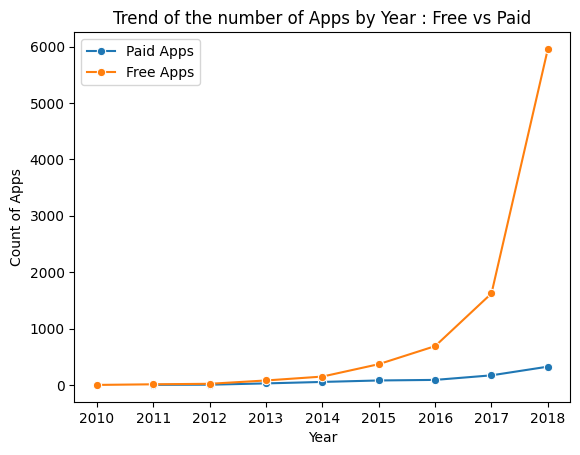

In [72]:
#Plotting graphs

sns.lineplot(x=paid_app_count_df.index, y=paid_app_count_df.values, label='Paid Apps',marker='o')
sns.lineplot(x=free_app_count_df.index, y=free_app_count_df.values, label='Free Apps',marker='o')

plt.xlabel('Year')
plt.ylabel('Count of Apps')

# Adding a title
plt.title("Trend of the number of Apps by Year : Free vs Paid")

# Adding a legend
plt.legend()

plt.show()

**Insights Gained**

In the above plot, we plotted the apps updated or added over the years comparing Free vs. Paid, by observing this plot we can conclude that before 2011 there were no paid apps.

Over the years free apps have been added more in comparison to the paid apps.

**Positive Business Impact:** The increasing number of free apps over the years suggests a growing market for free app offerings. This can be an opportunity for businesses to leverage free apps as a means to attract users, generate brand awareness, and potentially monetize through in-app purchases or advertisements.

**Negative Business Impact:** The relatively lower number of paid apps compared to free apps indicates potential challenges in monetizing through upfront app purchases. Businesses relying solely on paid app models may face competition from the abundance of free alternatives, which can limit revenue potential.

##**Top 20 Genres by number of Applications**

In [73]:
#Grouping the App count by Genres
apps_by_genres = play_store.groupby('Genres')['App'].count().reset_index()
apps_by_genres

,Genres,App
0,Action,299
1,Action;Action & Adventure,12
2,Adventure,73
3,Adventure;Action & Adventure,5
4,Adventure;Brain Games,1
...,...,...
113,Video Players & Editors,162
114,Video Players & Editors;Creativity,1
115,Video Players & Editors;Music & Video,2
116,Weather,79


In [74]:
#Finding the top 20 Genres
top_20_genres = apps_by_genres.sort_values('App', ascending=False).head(20)
top_20_genres

,Genres,App
107,Tools,826
51,Entertainment,561
38,Education,510
22,Business,420
70,Medical,395
79,Personalization,376
81,Productivity,374
66,Lifestyle,368
59,Finance,345
101,Sports,331


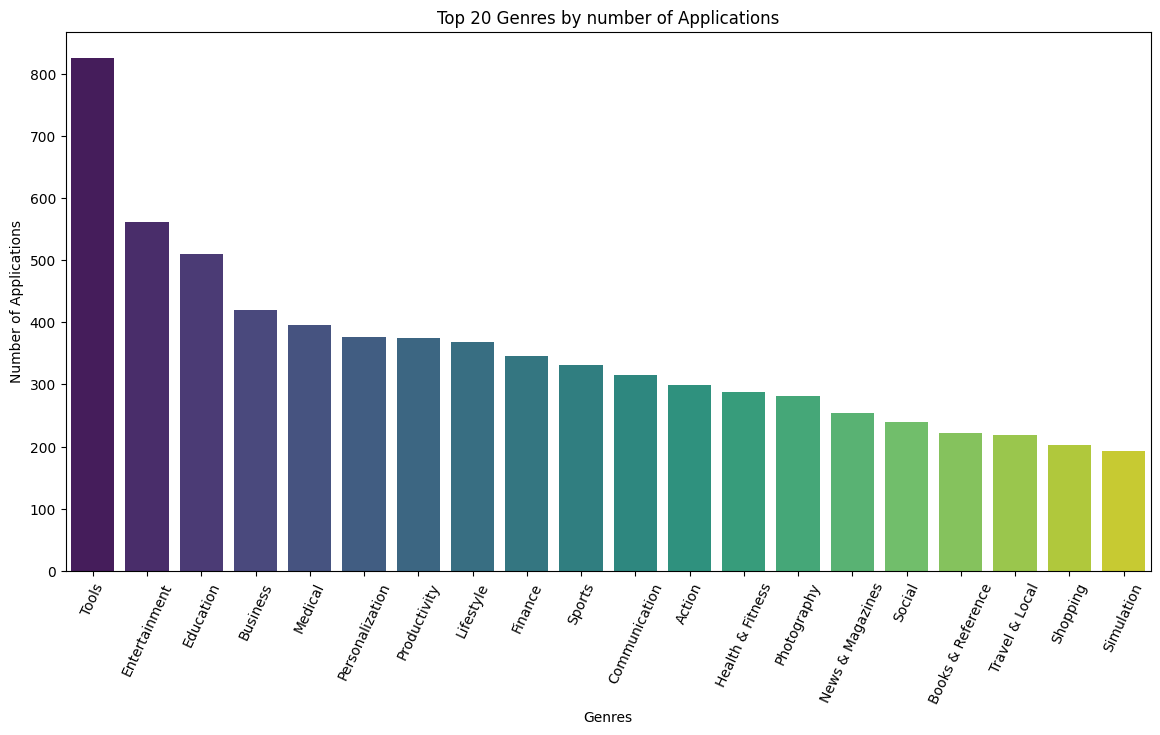

In [75]:
#barplot to visualize the top 20 genres by count
plt.figure(figsize=(14,7))
sns.barplot(x='Genres', y='App', data=top_20_genres, palette='viridis')
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of Applications")
plt.title("Top 20 Genres by number of Applications")
plt.show()

**Insights Gained:**


We can see from the above that Maximum number of apps present in google play store comes under Tools, Entertainment and Education Genres

**Positive Business Impact:** If a business or developer specializes in creating apps in these genres, the high number of apps in these categories indicates a potentially large user base and demand. Focusing on developing and improving apps in these genres can lead to a positive business impact by tapping into a popular and thriving market seament.

**Negative Impact:** On the other hand, the high number of apps in these genres also means that competition is likely to be intense. Standing out among a large number of similar apps can be challenging, and it may be more difficult to gain visibility, downloads, and user engagement. This could potentiall lead to negative growth if the apps are not able to differentiate themselves or provide unique value propositions compared to the existing apps in the same genres

##**Top 20 Genres by Installs**

In [76]:
#Grouping the number of installs by Genres
installs_by_genres = play_store.groupby('Genres')['Installs'].sum().reset_index()
installs_by_genres

,Genres,Installs
0,Action,3483039190
1,Action;Action & Adventure,53020500
2,Adventure,296695320
3,Adventure;Action & Adventure,106150000
4,Adventure;Brain Games,100000
...,...,...
113,Video Players & Editors,3916902720
114,Video Players & Editors;Creativity,5000000
115,Video Players & Editors;Music & Video,15000000
116,Weather,361100520


In [77]:
#Finding the top 20 Genres

top_20_genres_by_installs = installs_by_genres.sort_values('Installs', ascending=False).head(20)
top_20_genres_by_installs

,Genres,Installs
35,Communication,11038276251
107,Tools,7991771915
81,Productivity,5793091369
100,Social,5487867902
80,Photography,4649147655
113,Video Players & Editors,3916902720
6,Arcade,3755129155
0,Action,3483039190
26,Casual,3052830740
51,Entertainment,3014714684


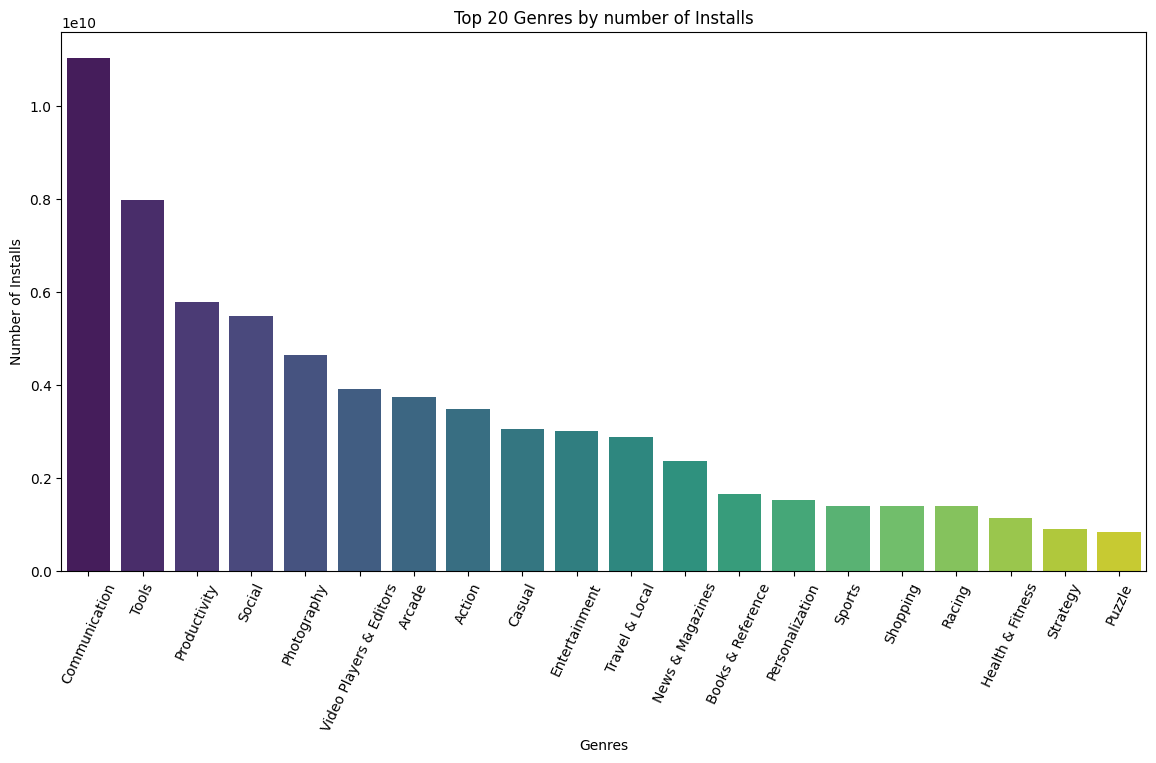

In [78]:
#barplot to visualize the top 20 genres by installs
plt.figure(figsize=(14,7))
sns.barplot(x='Genres', y='Installs', data=top_20_genres_by_installs, palette='viridis')
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of Installs")
plt.title("Top 20 Genres by number of Installs")
plt.show()



**Insights Gained**

As per the installation and requirement in the market plot, maximum installed apps comes under Communication, Tools, Productivity, and Social Genres.

**Positive Business Impact:** If a business focuses on creating apps in these genres, it aligns with the market demand and user preferences. The high number of installations indicates a significant user base and potential revenue opportunities. Developing high-quality apps in these genres that meet user needs can lead to a positive business impact, increased visibility, and higher chances of monetization.

**Negative Growth:** However, the high number of installed apps in these genres also implies intense competition. With a large number of apps, it becomes crucial to differentiate the app and provide unique value to stand out. It may become challenging to gain visibility and acquire a substantial user base without a solid marketing strategy and a clear differentiating factor. In a crowded market, if the app fails to offer a distinctive advantage or fails to meet user expectations. it may lead to negative growth or limited user adoption.

##**Top 10 apps with the highest number of positive reviews**


In [82]:
#Filtering the apps with positive reviews
positive_df = user_reviews[user_reviews['Sentiment'] == 'Positive']

In [88]:
#Grouping the 'positive_df' dataframe by 'App' and 'Sentiment' columns and counting the number of occurrences of each sentiment for each app
number_of_positive_reviews_per_app = positive_df.groupby('App')['Sentiment'].value_counts().sort_values(ascending=False).reset_index()
number_of_positive_reviews_per_app

,App,Sentiment,count
0,Helix Jump,Positive,209
1,Duolingo: Learn Languages Free,Positive,200
2,Calorie Counter - Macros,Positive,174
3,Calorie Counter - MyFitnessPal,Positive,169
4,Bowmasters,Positive,169
...,...,...,...
848,Calculator with Percent (Free),Positive,1
849,Call Blocker,Positive,1
850,Calendar+ Schedule Planner App,Positive,1
851,Calendar Widget Month + Agenda,Positive,1


In [90]:
# Selecting the top 10 apps with the highest number of positive reviews
top_10_positive_reviews = number_of_positive_reviews_per_app.head(10)
top_10_positive_reviews

,App,Sentiment,count
0,Helix Jump,Positive,209
1,Duolingo: Learn Languages Free,Positive,200
2,Calorie Counter - Macros,Positive,174
3,Calorie Counter - MyFitnessPal,Positive,169
4,Bowmasters,Positive,169
5,10 Best Foods for You,Positive,162
6,Google Photos,Positive,143
7,8fit Workouts & Meal Planner,Positive,137
8,Garena Free Fire,Positive,136
9,DRAGON BALL LEGENDS,Positive,127


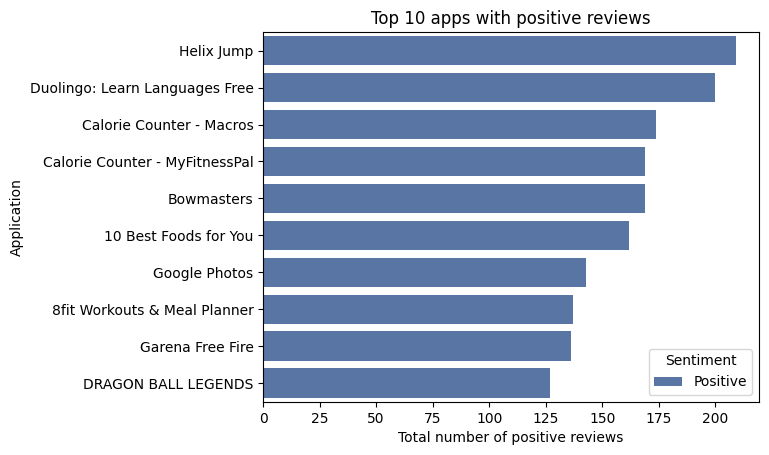

In [95]:
#plotting a barplot to visualize

sns.barplot(y='App', hue='Sentiment', x='count', data=top_10_positive_reviews, palette='deep')
plt.xlabel('Total number of positive reviews')
plt.ylabel('Application')
plt.title('Top 10 apps with positive reviews')
plt.show()

##**Top 10 apps with the highest number of negetive reviews**


In [98]:
#Filtering the apps with positive reviews
negetive_df = user_reviews[user_reviews['Sentiment'] == 'Negative']

In [99]:
#Grouping the 'negetive_df' dataframe by 'App' and 'Sentiment' columns and counting the number of occurrences of each sentiment for each app
number_of_negetive_reviews_per_app = negetive_df.groupby('App')['Sentiment'].value_counts().sort_values(ascending=False).reset_index()
number_of_negetive_reviews_per_app

,App,Sentiment,count
0,Angry Birds Classic,Negative,147
1,Candy Crush Saga,Negative,126
2,Bowmasters,Negative,119
3,8 Ball Pool,Negative,106
4,Candy Crush Soda Saga,Negative,96
...,...,...,...
777,AirBrush: Easy Photo Editor,Negative,1
778,591房屋交易-香港,Negative,1
779,Hipmunk Hotels & Flights,Negative,1
780,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Negative,1


In [100]:
# Selecting the top 10 apps with the highest number of negetive reviews
top_10_negetive_reviews = number_of_negetive_reviews_per_app.head(10)
top_10_negetive_reviews

,App,Sentiment,count
0,Angry Birds Classic,Negative,147
1,Candy Crush Saga,Negative,126
2,Bowmasters,Negative,119
3,8 Ball Pool,Negative,106
4,Candy Crush Soda Saga,Negative,96
5,Garena Free Fire,Negative,81
6,Cooking Fever,Negative,79
7,Alto's Adventure,Negative,72
8,Block Puzzle,Negative,71
9,Agar.io,Negative,66


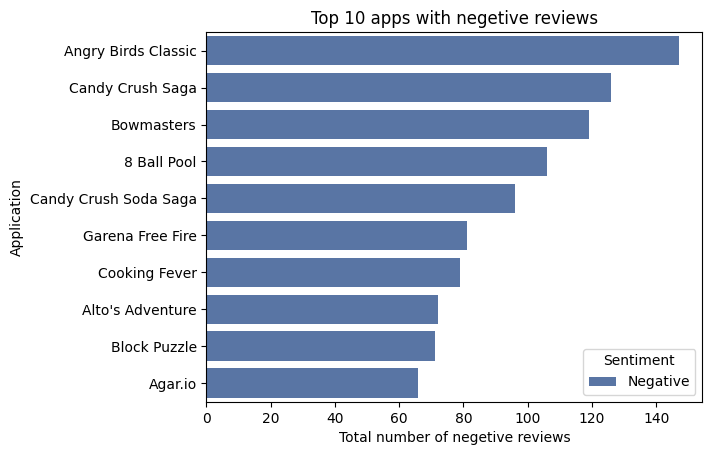

In [101]:
#plotting a barplot to visualize

sns.barplot(y='App', hue='Sentiment', x='count', data=top_10_negetive_reviews, palette='deep')
plt.xlabel('Total number of negetive reviews')
plt.ylabel('Application')
plt.title('Top 10 apps with negetive reviews')
plt.show()

**Insights Gained from positive and negetive reviews**

While high negative reviews may initially seem detrimental, they can provide valuable feedback and opportunities for improvement. By actively addressing and resolving the issues raised in negative reviews, businesses can enhance their products and services, leading to a positive impact. This demonstrates a commitment to customer satisfaction, builds trust, and can result in improved ratings, positive word-of-mouth. and increased user engagement.

However if negative reviews persist and the issues raised are not effectively addressed, it can lead to negative growth. High numbers of negative reviews indicate user dissatisfaction, which can result in decreased user retention, lower app ratings, and reduced new user acquisition. Negative reviews mav also deter potential users from downloading or engaging with the app, impacting business growth.

##**Correlation Heatmap**

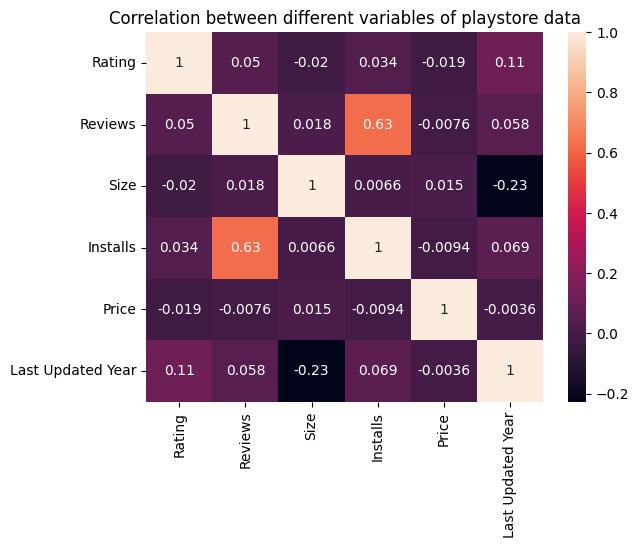

In [107]:
# Correlational Heatmap Visualization code of playstore data

sns.heatmap(play_store.corr(numeric_only=True), annot=True)
plt.title('Correlation between different variables of playstore data')
plt.show()

In [110]:
#Correlation between columns of play store data and user reviews

#Merging two dataframes
merged_df = pd.merge(play_store, user_reviews, on='App')

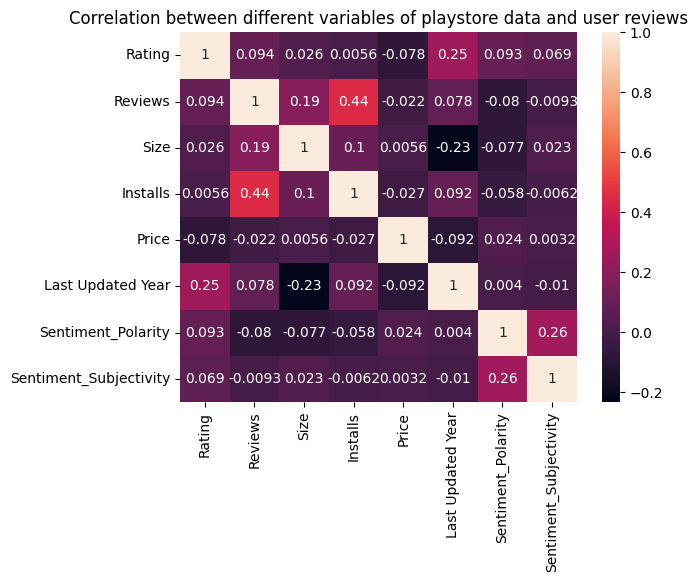

In [112]:
#Coreelation Heatmap visualization code
sns.heatmap(merged_df.corr(numeric_only=True),annot=True)
plt.title('Correlation between different variables of playstore data and user reviews')
plt.show()

**Insights Gained:**

1. There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.

2. The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.

3. The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases. the app installs and number of reviews also increase.

4. Sentiment polarity shows a very weak positive correlation with sentiment subiectivity, indicating that as the polarity of sentiment (positive or negative) increases, there is a slight tendency for subjectivity (the degree of personal opinion) to also increase. However, this relationship is not very strong.


##*5. Solution to Business Objective*

**Suggestion to the client to achieve Business Obiective**

1.  Since the majority of apps on the Play Store are free, the client can consider adopt ad-supported model for their apps. This involves offering a basic version of the app for free while providing additional premium features or content through in-app purchases or subscriptions.

2.  To differentiate their paid apps from the abundance of free alternatives, the client should focus on providing unique value and superior user experience. Identify specific user needs, pain points or desires and create apps that provide enhanced features, exclusive content, advanced functionality or premium experience that users are willing to pay for. Provide excellent customer support to paid app users. Address their queries, concerns, or technical issues promptly and effectively.

3.  Given the majority of positive sentiment reviews, the client should leverage these positive experiences to their advantage. They can showcase positive reviews on their website, social media channels, or in marketing materials to build trust and credibility. Encouraging satisfied customers to leave reviews and ratings can also help attract new customers.

4.  By addressing negative feedback in a transparent and constructive manner, the client can mitigate potential negative impacts and showcase their dedication to improving thair products or services.

5.  To ensure continued positive business impact, it is important for businesses to analyze customer feedback (both positive and negative) can provide valuable insights. Identifving common themes or recurring issues from negative and neutral reviews can help prioritize areas for improvement. The client should focus on addressing these issues, enhancing product quality by giving regular app updates.

6.  Provide multilingual support within the apps to cater to users from different regions and language backgrounds.

##CONCLUSION

1. **App Distribution:** The majority of apps on the Play Store (approximately 92%) are free, indicating a preference for free apps among users. This highlights the importance of considering monetization strategies such as ads or in-app purchases.

2. **Age Restrictions:** Around 81.8% of the apps in the dataset have no age restrictions, indicating a broad target audience. This provides opportunities for developers to create apps that cater to a wide range of users

3. **Competitive Category**: The "Family" category is identified as the most competitive category, suggesting a need for developers to focus on differentiation and unique value propositions within this category.

4.  **Popular Category:** The "Game" category has the highest number of app installs, highlighting the popularity of gaming apps among users. Developers can leverage this demand by creating engaging and high-quality game apps.

5.  **Top-Rated Apps:** The majority of apps in the dataset are top-rated, which indicates a positive reception from users. This emphasizes the importance of delivering excellent user experiences and maintaining high-quality standards

6. **Category Analysis:** The top three categories with the highest app count are "Family! "Game" and "Tools." Developers can consider these categories for potential business opportunities.

7.  **Genre Analysis:** The top genres include "Tools. "Entertainment" "Education," "Business, and "Medical." Developers can explore these genres to target specific user needs and preferences.

8. **Correlation:** There is a strong positive correlation between the number of app reviews and app installs, suggesting that popular apps tend to have a larger user base and consequently receive more reviews.